<a href="https://colab.research.google.com/github/Diechi09/AI-Machine-Learning-Foundations/blob/main/Assignment1_DiegoO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
file_path = "/content/drive/My Drive/MLClass/titanic3.xls"
df = pd.read_excel(file_path)
df.head(3)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# After the dataframe has been imported into our notebook, we can start to dive into it and analyze its information

### TASK 1


In [20]:
#Start with some simple pandas commands that give you some surface level information about the dataframe that you have

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [11]:
df.isnull().sum()

,0
pclass,0
survived,0
name,0
sex,0
age,263
sibsp,0
parch,0
ticket,0
fare,1
cabin,1014


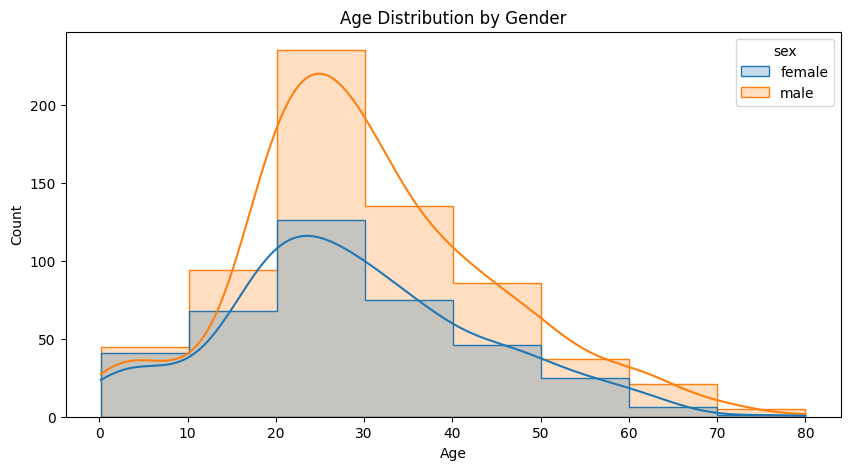

In [26]:
plt.figure(figsize=(10,5))
sns.histplot(df, x="age", hue="sex", bins=8, kde=True, element="step", common_norm=False)
plt.title("Age Distribution by Gender")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

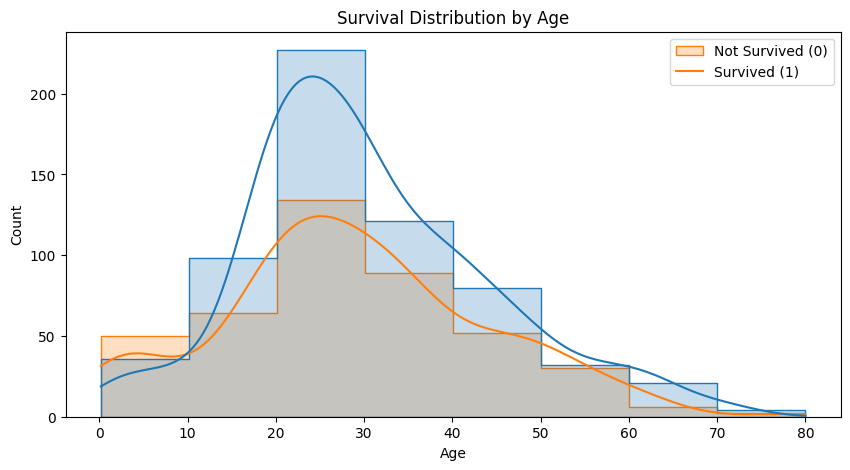

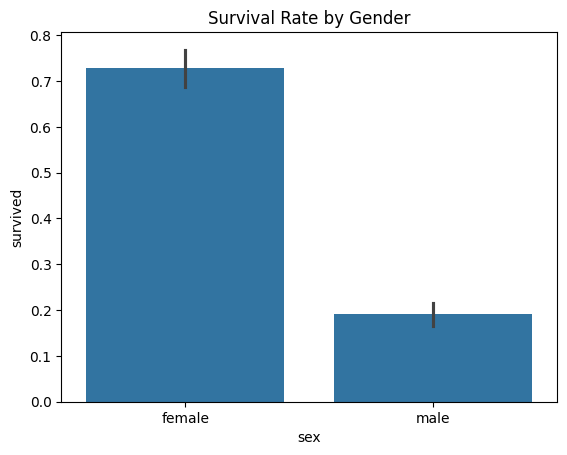

In [27]:
plt.figure(figsize=(10,5))
sns.histplot(df, x="age", hue="survived", bins=8, kde=True, element="step", common_norm=False)
plt.title("Survival Distribution by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(["Not Survived (0)", "Survived (1)"])
plt.show()

sns.barplot(x="sex", y="survived", data=df)
plt.title("Survival Rate by Gender")
plt.show()

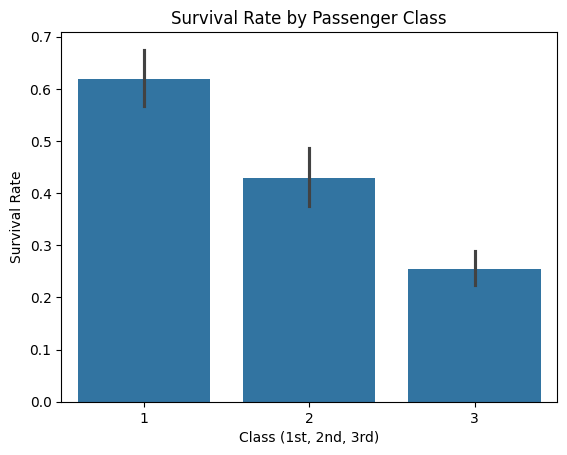

In [17]:
sns.barplot(x="pclass", y="survived", data=df)
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Class (1st, 2nd, 3rd)")
plt.ylabel("Survival Rate")
plt.show()

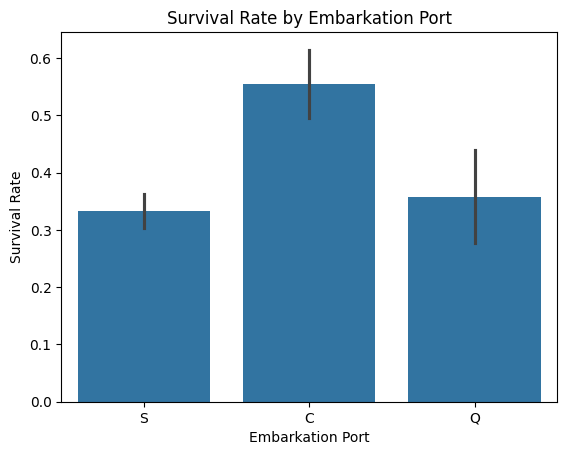

In [28]:
sns.barplot(x="embarked", y="survived", data=df)
plt.title("Survival Rate by Embarkation Port")
plt.xlabel("Embarkation Port")
plt.ylabel("Survival Rate")
plt.show()

In [35]:
avg_fare = df.fare.mean()
print(f"Average ticket fare: ${avg_fare:.2f}")

total_deaths = df[df["survived"] == 0].shape[0]
bodies_found = df["body"].notna().sum()
recovery_rate = (bodies_found / total_deaths) * 100
print(f"Percentage ofdead bodies found: {recovery_rate:.2f}%")


Average Ticket Price: $33.30
Percentage of Dead Bodies found: 14.96%
